Amril Hakim Sihotang

Tentang Saya: Dicoding Academy graduate and NetAcad graduate.

Kelas Belajar Machine Learning untuk Pemula

In [47]:
# 1 Import library yang dibutuhkan
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from pathlib import Path
from google.colab import files
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import time

In [48]:
# 2 Download dataset rockpaperscissors dan ekstrak ke direktori /tmp

!wget --no-check-certificate https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip -P /tmp
!unzip /tmp/rockpaperscissors.zip -d /tmp

Streaming output truncated to the last 5000 lines.
  inflating: /tmp/rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: /tmp/rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: /tmp/rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: /tmp/rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: /tmp/rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: /tmp/rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: /tmp/rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  

In [49]:
# 3 Bagi dataset menjadi train set dan validation set
base_dir = '/tmp/rockpaperscissors/rps-cv-images'


# 4 Menentukan ukuran validation set
# harus 40% dari total dataset + menerapkan saran ketiga
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,  # geser lebar gambar
    height_shift_range=0.2,  # geser tinggi gambar
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4  # Split 40% data untuk validation set
)
# 5 Implementasi augmentasi gambar menggunakan ImageDataGenerator
train_generator = datagen.flow_from_directory(
    base_dir ,
    target_size=(150, 150),
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir ,
    target_size=(150, 150),
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [50]:
# 6 Buat model sequential dengan lebih dari 1 hidden layer(kriteria utama + menerapkan saran kedua)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),  # Hidden layer pertama
    tf.keras.layers.Dropout(0.5),  # Dropout layer untuk mengurangi overfitting
    tf.keras.layers.Dense(256, activation='relu'),  # Hidden layer kedua
    tf.keras.layers.Dense(3, activation='softmax')  # Jumlah kelas = 3
])

In [51]:
# 7 menerapkan saran keempat,menggunakan optimizer dan loss-function yang tidak diajarkan di kelas.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
# 8 Menerapkan saran pertama: Akurasi dari model di atas 85%
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        target_accuracy = 0.97

        # Mendapatkan akurasi pada data validasi dari logs
        validation_accuracy = logs.get('val_accuracy')


        if validation_accuracy is not None and validation_accuracy >= target_accuracy:
            print(f" Akurasi mencapai {target_accuracy * 100}% pada epoch {epoch + 1}! Berhenti pelatihan.")
            self.model.stop_training = True


my_callback = MyCallback()
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=35,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    callbacks=[my_callback]
)

Epoch 1/35
41/41 [==============================] - 23s 506ms/step - loss: 1.1454 - accuracy: 0.3463 - val_loss: 1.0646 - val_accuracy: 0.3924
Epoch 2/35
41/41 [==============================] - 16s 392ms/step - loss: 0.8666 - accuracy: 0.5998 - val_loss: 0.7224 - val_accuracy: 0.6528
Epoch 3/35
41/41 [==============================] - 16s 394ms/step - loss: 0.6171 - accuracy: 0.7223 - val_loss: 0.5032 - val_accuracy: 0.7963
Epoch 4/35
41/41 [==============================] - 16s 401ms/step - loss: 0.5140 - accuracy: 0.7933 - val_loss: 0.4543 - val_accuracy: 0.8426
Epoch 5/35
41/41 [==============================] - 16s 396ms/step - loss: 0.4459 - accuracy: 0.8292 - val_loss: 0.4466 - val_accuracy: 0.8484
Epoch 6/35
41/41 [==============================] - 20s 503ms/step - loss: 0.4702 - accuracy: 0.8222 - val_loss: 0.3942 - val_accuracy: 0.8530
Epoch 7/35
41/41 [==============================] - 16s 395ms/step - loss: 0.4733 - accuracy: 0.8151 - val_loss: 0.3554 - val_accuracy: 0.8738

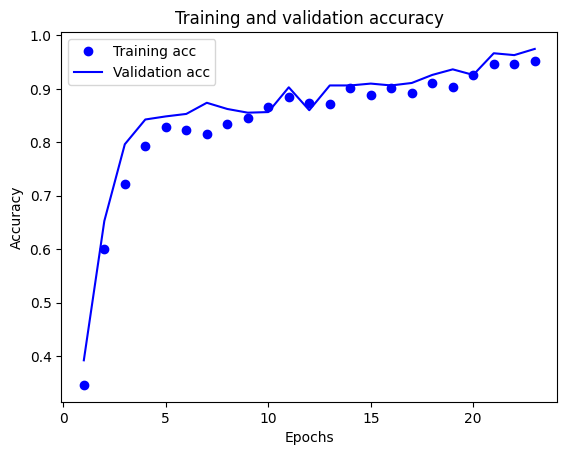

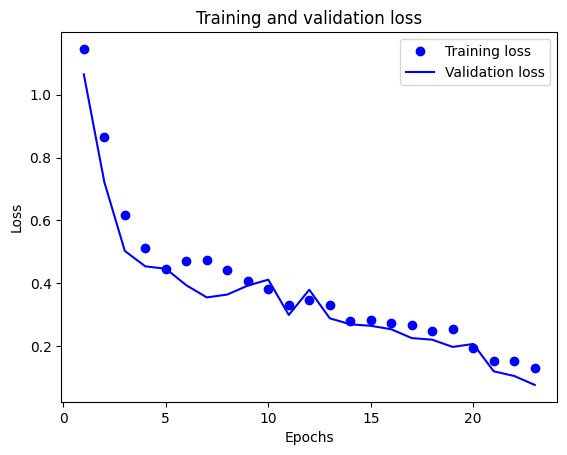

In [53]:
# Tampilkan dalam bentuk Grafik history model

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot akurasi
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
# Menerapkan model akurasi lainnya menggunakan ReduceLROnPlateau Callback
class MyCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super(MyCallback, self).__init__()
        self.learning_rates = []

    def on_epoch_end(self, epoch, logs={}):
        target_accuracy = 0.97


        validation_accuracy = logs.get('val_accuracy')

        if validation_accuracy is not None and validation_accuracy >= target_accuracy:
            print(f" Akurasi mencapai {target_accuracy * 100}% pada epoch {epoch + 1}! Berhenti pelatihan.")
            self.model.stop_training = True

    def on_epoch_begin(self, epoch, logs=None):

        current_lr = tf.keras.backend.get_value(self.model.optimizer.lr)
        self.learning_rates.append(current_lr)


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

my_callback = MyCallback()

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=35,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    callbacks=[my_callback, reduce_lr]
)


Epoch 1/35
41/41 [==============================] - 21s 514ms/step - loss: 0.1441 - accuracy: 0.9477 - val_loss: 0.1317 - val_accuracy: 0.9595 - lr: 0.0010
Epoch 2/35
41/41 [==============================] - 17s 424ms/step - loss: 0.1036 - accuracy: 0.9665 - val_loss: 0.1592 - val_accuracy: 0.9468 - lr: 0.0010
Epoch 3/35
41/41 [==============================] - 20s 504ms/step - loss: 0.1308 - accuracy: 0.9454 - val_loss: 0.1328 - val_accuracy: 0.9549 - lr: 0.0010
Epoch 4/35
41/41 [==============================] - 16s 395ms/step - loss: 0.1004 - accuracy: 0.9688 - val_loss: 0.1324 - val_accuracy: 0.9537 - lr: 0.0010
Epoch 5/35
41/41 [==============================] - 16s 400ms/step - loss: 0.1697 - accuracy: 0.9454 - val_loss: 0.1215 - val_accuracy: 0.9618 - lr: 0.0010
Epoch 6/35
41/41 [==============================] - 16s 394ms/step - loss: 0.1000 - accuracy: 0.9711 - val_loss: 0.1132 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 7/35
41/41 [==============================] - 20s 498ms/st

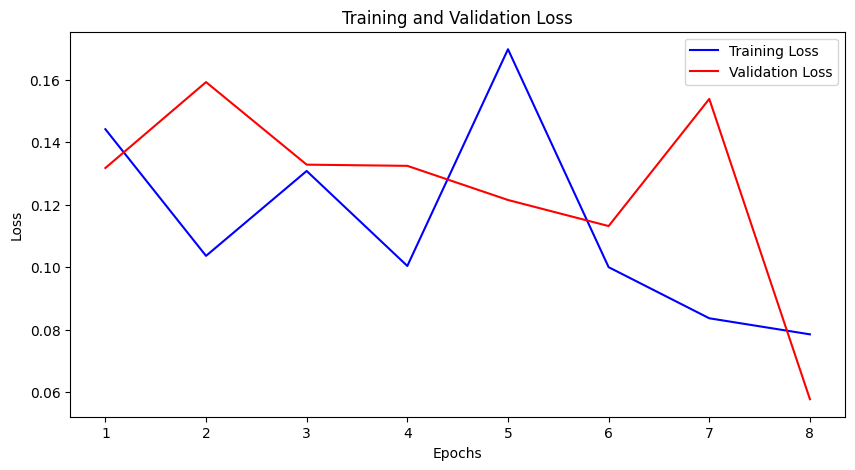

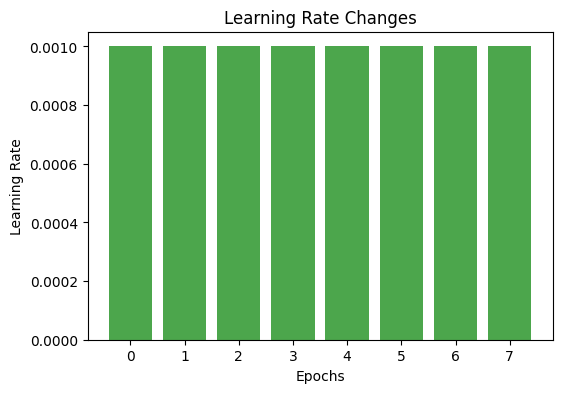

In [55]:
# Ambil riwayat pelatihan dari ReduceLROnPlateau Callback
training_loss = history.history['loss']
validation_loss = history.history['val_loss']


learning_rates = my_callback.learning_rates

# Plot grafik batang (Loss)
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(10, 5))

# Plot loss
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Plot grafik batang (Learning Rate Changes)
plt.figure(figsize=(6, 4))

plt.bar(np.arange(len(learning_rates)), learning_rates, color='g', alpha=0.7)
plt.title('Learning Rate Changes')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')

plt.show()

Saving qZX4Zcms0Ffpe8v7.png to qZX4Zcms0Ffpe8v7 (1).png
1/1 [==============================] - 0s 75ms/step
qZX4Zcms0Ffpe8v7 (1).png
paper


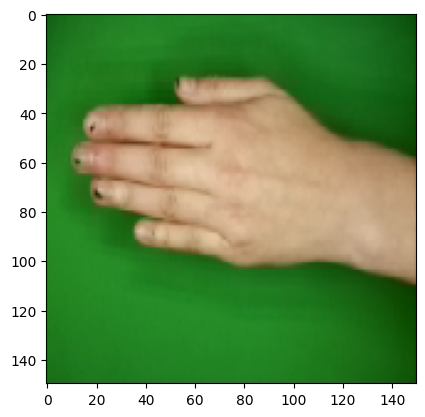

In [56]:
uploaded = files.upload()

for fn in uploaded.keys():


  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

classes = model.predict(images, batch_size=10)[0]
print(fn)
predicted_class = np.argmax(classes)
if predicted_class == 0:
    print('paper')
elif predicted_class == 1:
    print('rock')
else:
    print('scissors')
